# Green function for a bounded domain

We want to solve the problem

$$\nabla^2 u(r, \theta) = f(r, \theta)\quad 0 < r < 1\, $$

with $u(1, \theta) = 0\quad 0 \leq \theta \leq 2\pi$.

We could solve it by

1. Finding the potential $G(r, \theta, \rho, \phi)$ at
$(r, \theta)$, which we force to be zero on the boundary and
which is due to a single charge (magnitude 1) at $(\rho, \phi)$.

2. Summing the individual responses $G(r, \theta, \rho, \phi)$
weighted by the right-hand side (charge density) $f(r, \theta)$
over all $(\rho, \phi)$ in the circle to get the solution

  $$u(r, \theta) = \int\limits_0^{2\pi}\int\limits_{0}^{1}
  G(r, \theta, \rho, \phi) f(\rho, \phi)\, \rho\, d\rho\, d\phi\, .$$
  
In the case of no boundary, we could use the fundamental solution

$$\frac{1}{2\pi}\ln(r)\, .$$

## Deduction of the Green function

Since the function

$$\frac{1}{2\pi}\ln(R)$$

is the potential in $P=(r,\theta)$ due to a unit load at
$Q = (\rho, \phi)$, we need to modify it to enforce the
zero value at the boundary. For that we could think about
placing a (negative) charge outside the circle. This
will gives us a circle of constant potential for $r=1$.
Then, we can substract the constant value.

<img src="img/contours_image.svg"
     width=600>
     
If we place the external charge at
$\bar{Q} = (\bar{\rho}, \bar{\phi}) = (1/\rho, \phi)$ the potential
at $r=1$ would be constant. The potential would be

$$u(r, \theta) = \frac{1}{2\pi}\ln R - \frac{1}{2\pi}\ln \bar{R}\, ,$$

$R$ and $\bar{R}$ are the distances from the charges to $(r,\theta)$.
The constant value at $r=1$ is

$$\frac{1}{2\pi}\ln \rho\, .$$


The Green function is, then,

$$G(r, \theta, \rho, \phi) = \frac{1}{2\pi}\ln R
- \frac{1}{2\pi}\ln \bar{R} - \frac{1}{2\pi}\ln\rho\, ,$$


with

\begin{align*}
&R = \sqrt{r^2 + 2r\rho\cos(\theta - \phi) + \rho^2}\, ,\\
&\bar{R} = \sqrt{r^2 + 2r/\rho\cos(\theta - \phi) + 1/\rho^2}\, .
\end{align*}

This is illustrated in the following graphic.

<img src="img/circle_image.svg"
     width=600>
     
     
The solution to this problem is


$$u(r, \theta) = \int\limits_0^{2\pi}\int\limits_0^2
G(r, \theta, \rho, \phi) f(\rho, \phi) \rho d\rho d\phi\, ,$$

or

$$u(r, \theta) = \frac{1}{2\pi}\int\limits_0^{2\pi}\int\limits_0^2
\ln(R/\bar{R}\rho) f(\rho, \phi) \rho d\rho d\phi\, .$$

We could check that this Green function satisfy the boundary conditions
in the following code.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r, theta = np.mgrid[0:1:201j, 0:2*np.pi:201j]
x = r*np.cos(theta)
y = r*np.sin(theta)

In [4]:
rho = 0.5
phi = 0
R = np.sqrt(r**2 - 2*r*rho*np.cos(theta - phi) + rho**2)
Rc = np.sqrt(r**2 - 2*r/rho*np.cos(theta - phi) + 1/rho**2)
G = 0.5/np.pi * np.log(R/(Rc*rho))

/home/nguarinz/anaconda3/envs/bem/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


<IPython.core.display.Javascript object>


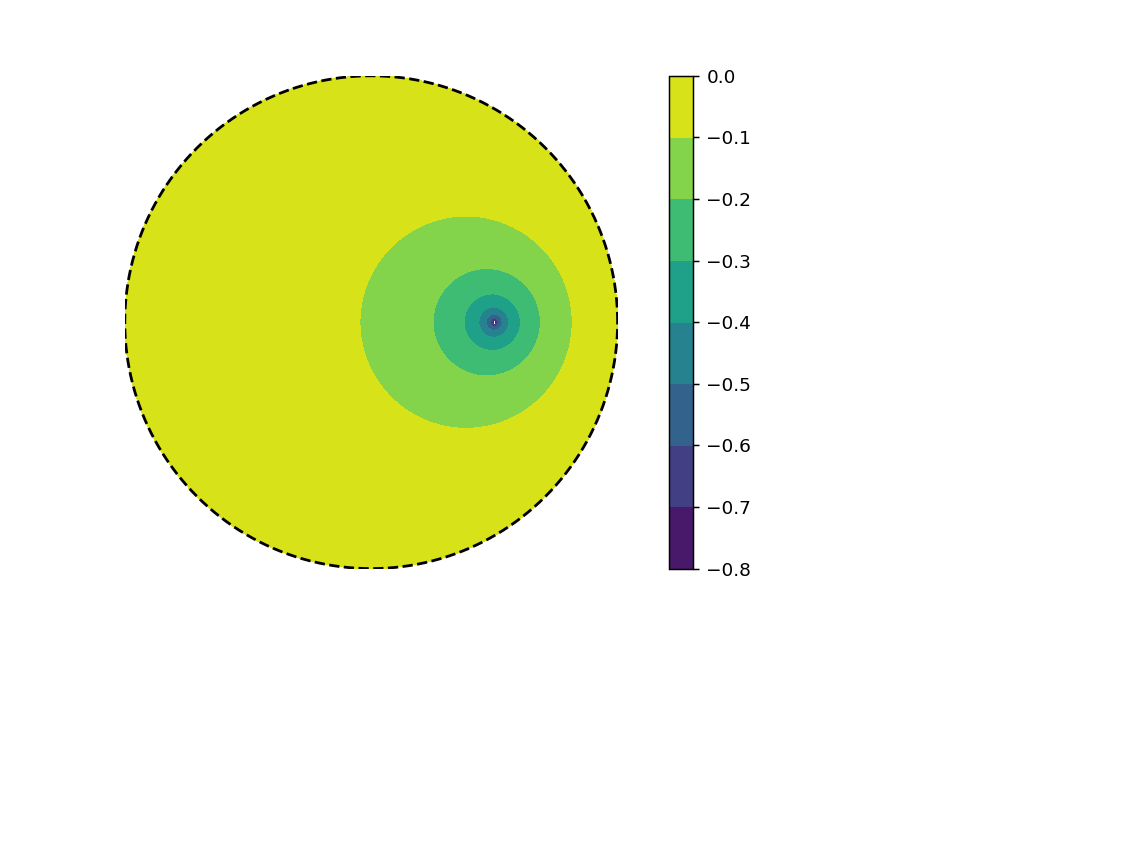

(-1.0, 1.0, -1.0, 1.0)

In [9]:
plt.figure()
plt.contourf(x, y, G)
plt.colorbar()
plt.contour(x, y, G, [-1e-6], colors="black")
plt.axis("image")
plt.axis("off")

## References

- Farlow, S. J. (1993). Partial differential equations for scientists and engineers. Courier Corporation.

In [6]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'custom.css'
HTML(open(css_file, "r").read())